In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pltmatplotlib
import seaborn as sns

In [18]:
cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
cars = pd.read_csv(r'https://raw.githubusercontent.com/CRodriguezEc/tia_actividad_002/master/online_shoppers_intention.csv'
                    , names=cols
                    , header=None)

In [33]:
cars.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.2166667,0.015789474,0.024561404,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
7,0,0,0,0,1,0,0.2,0.2,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
8,1,0,0,0,0,0,0.2,0.2,0,0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
9,0,0,0,0,2,37,0,0.1,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [34]:
cars.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331,12331
unique,28,3336,18,1259,312,9552,1873,4778,2705,7,11,9,14,10,21,4,3,3
top,0,0,0,0,1,0,0,0.2,0,0,May,2,2,1,2,Returning_Visitor,FALSE,FALSE
freq,5768,5903,9699,9925,622,755,5518,710,9600,11079,3364,6601,7961,4780,3913,10551,9462,10422


In [21]:
plot_size = pltmatplotlib.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
pltmatplotlib.rcParams["figure.figsize"] = plot_size

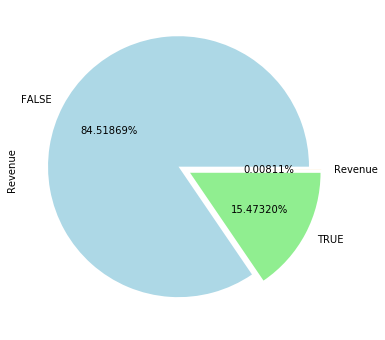

In [22]:
cars.Revenue.value_counts().plot(   kind = 'pie'
                                    , autopct='%0.05f%%'
                                    , colors = ['lightblue', 'lightgreen', 'orange']
                                    , explode = ( 0.05, 0.05, 0.05 ) )